<a href="https://colab.research.google.com/github/Priya1598/DeepLearning_Breast_cancer/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Handwritten digit classification using Depp Learning (Neural Network)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from google.colab.patches import cv2_imshow
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST data

In [24]:
(X_train,Y_train),(x_test,y_test)=mnist.load_data()

In [25]:
type(X_train)

numpy.ndarray

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
print(X_train.shape,Y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training_data = 60000 images
Test_data-10000 images
Image Dimension is 28*28
Grayscale images is 1 channel


In [28]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [29]:
print(X_train[10].shape)

(28, 28)


Displaying the image from array

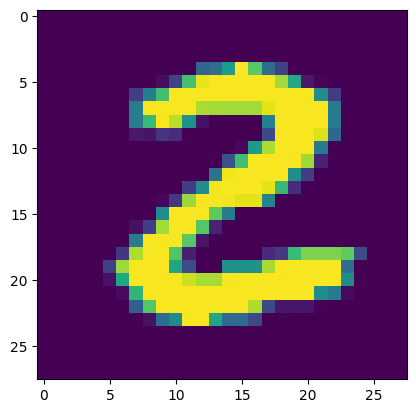

2


In [30]:
plt.imshow(X_train[25])
plt.show()
#Printing the Corresponding label
print(Y_train[25])

In [31]:
##Image Labels
print(Y_train.shape,y_test.shape)

(60000,) (10000,)


In [32]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply one hot encoding

All the images have same dimension in this dataset, if not we have to resize all the images to a common dimension

In [33]:
## scaling the values

In [34]:
X_train_scaled=X_train/255
x_test_scaled=x_test/255

In [35]:
print(X_train_scaled[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network


In [36]:
model=tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(50,activation='relu'),
                            tf.keras.layers.Dense(50,activation='relu'),
                            tf.keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
##Compiling the Neural Network

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',   ### if you have used onehot encoding u will use categorical cross entropy
              metrics=['accuracy'])

In [39]:
## Training the Neural Network
model.fit(X_train_scaled,Y_train,epochs=5)  #epoch = How many times go through the data

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8551 - loss: 0.5169
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9523 - loss: 0.1574
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9656 - loss: 0.1112
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9739 - loss: 0.0870
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9777 - loss: 0.0707


In [40]:
## Loss value is the distance between the actual value and predicted value

Training data accuracy = 99



**Accuracy on test data**



In [41]:
loss,accuracy= model.evaluate(x_test,y_test)
print(accuracy)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4681 - loss: 21.0321
0.4713999927043915
18.69464683532715


In [42]:
##First datapoint in X_test

7


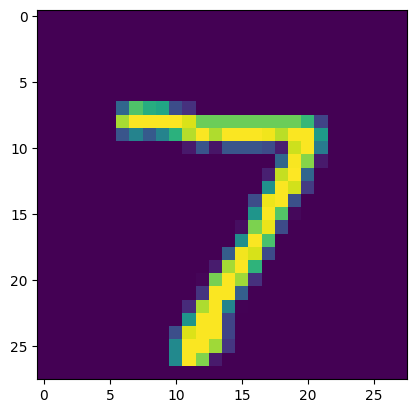

In [44]:
plt.imshow(x_test[0])
plt.show
print(y_test[0])

In [46]:
Y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [47]:
print(Y_pred.shape)  # here we have 10 classes as output (unique values)

(10000, 10)


In [48]:
print(Y_pred[0])

[0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]


model.predict gives the prediction probability of each class for that particular datapoint


In [50]:
##converting the prediction probabilities to class label
label_for_first_image=np.argmax(Y_pred[0])
print(label_for_first_image)
#

3


In [51]:
##here 3rd index has the max value so it is showing 3, means it is 3rd index

In [53]:
##Converting the prediction probabilities to class labels for all test data points
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)
#

[np.int64(3), np.int64(1), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(3), np.int64(5), np.int64(4), np.int64(0), np.int64(6), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(4), np.int64(2), np.int64(3), np.int64(4), np.int64(7), np.int64(5), np.int64(6), np.int64(3), np.int64(4), np.int64(0), np.int64(3), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(0), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(2), np.int64(4), np.int64(1), np.int64(2), np.int64(3), np.int64(1), np.int64(1), np.int64(4), np.int64(4), np.int64(3), np.int64(3), np.int64(5), np.int64(3), np.int64(5), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(0), np.int64(7), np.int64(2), np.int64(5), np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(2), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(7), np.int64(1), np.int64(3), np.int64(3)

In [54]:
print(Y_pred)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [55]:
## Y_test --> True Labels
## Y_pred_label ---> prediced by neural network


Confusion Matrix

In [56]:
con_mat= confusion_matrix(y_test,Y_pred_labels)
print(con_mat)

tf.Tensor(
[[ 974    0    1    4    0    0    1    0    0    0]
 [   3 1129    2    0    0    1    0    0    0    0]
 [  42  732  257    0    1    0    0    0    0    0]
 [   9  135  264  602    0    0    0    0    0    0]
 [  20   21  143    1  797    0    0    0    0    0]
 [  93   12   18  530    8  230    0    0    0    1]
 [ 176   11  355    3  143  165  105    0    0    0]
 [  19   53  351  178   34   23    0  370    0    0]
 [  52   14  317  248   55   65    8   12  203    0]
 [  29   11   24  109  467   33    0  157  132   47]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

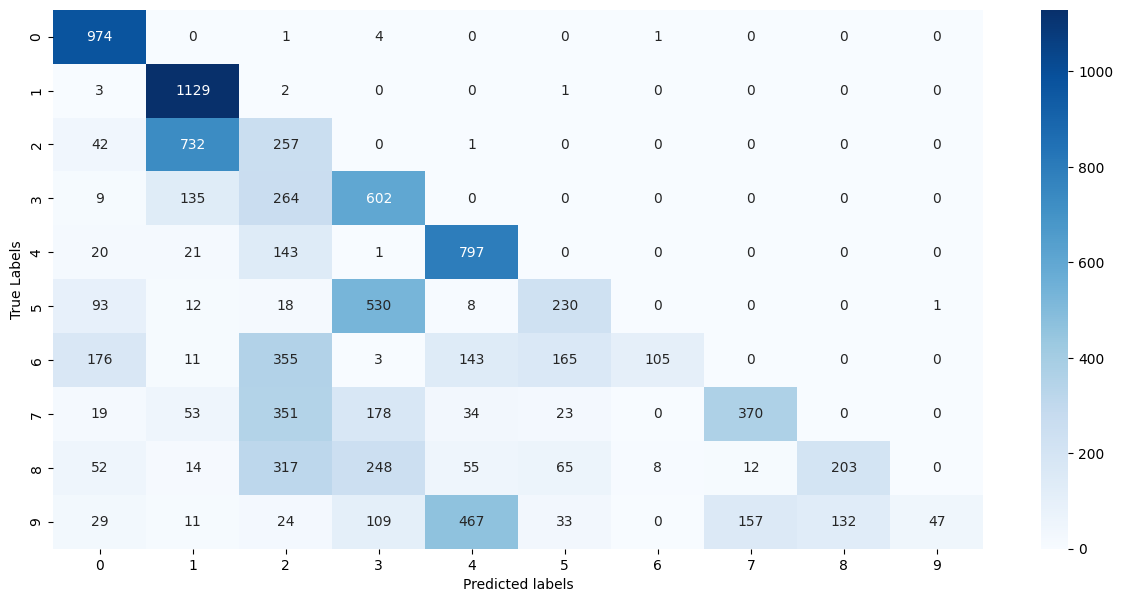

In [63]:
plt.figure(figsize=(15,7))
import seaborn as sns
sns.heatmap(con_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted labels')

my true label is 0 but it is predicted as 1 and it goes on...0 values is predicted as 3 with 4 images.so daigonal values are correctly predicted one

Building the predictive system

In [64]:
data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxASEBISEhISFhUWGBYWFxYYERYVFRgTFxkXFhUTFRgZHCggGBslGxcXITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGg8QGjIgFSI3Kys3LS0uNzctLSsrKzctKystLDc3LSstLSsrKysrNy0tKy0rLSsrKystLSsrNy0rLf/AABEIAOIA3wMBIgACEQEDEQH/xAAcAAEAAgIDAQAAAAAAAAAAAAAABwgCBgMEBQH/xABKEAABAgIFBQsJBwMCBwEAAAABAAIDEQQFEiExEyIjMkEGBwgUFzNRYXFysTVCUlOBkcHR8CRDYpKTodJUlNM0ghUWc3SDs+El/8QAFgEBAQEAAAAAAAAAAAAAAAAAAAIB/8QAHREBAAICAwEBAAAAAAAAAAAAAAERAkExcfChUf/aAAwDAQACEQMRAD8A3jdtu8otVmE2OyM8xrc8m1psllm0Bac2Wv14LWOXKrfUU3N1cyFf39KvE4R851fddKkSO1w0N5+tqhdBYPlzq31FMv1syFID8OlTlyqzDIU2QvGZBmT+LS4KviILB8ulXY5CmTNxFiFZl1aXFfOXGrNXIU2zjOxBtT69Lgq+ogsHy6VdrcXpdrCViFZl+rivnLjVmrkKbZN5NiDan1aXBV9RBYPl0q7HIUyYuAsQrMuvS4py5VbhkKbI3nMgzB/DpcFXxEFg+XOrfUUzN1cyFf39KnLnVvqKZna2ZCu7mlVfEQWEZv4VaSBkKbcRZzIN5/HpcF9bv4VcXSyFMtOMiLEKQ2ZulVfqPrt7R4rODzre8PFTMpmatPnLjVmGQpsheDYg2p9B0uCculXa3F6XawlYhWZdWlxVfEVKWC5cas1chTrOM7EG1P8AVwX3l0q7W4vS7WErEKzLr0uKr4iCwfLjVmGQpsjeTYg2gerS4Jy51bjkKZMYZkKRH4tLiq+IgsHy5Vb6im52tmQbu7pU5c6t9RTM3VzIV/f0qr4iCwfLnVvqKZna2ZCu7ulTlyq3DIU2QvGZBmT+LS4KviILB8ulXY5CmTNxFiFZl1aXFfOXGrNXIU2zjOxBtT69Lgq+ogsHy6VdrcXpdrCViFZl+ritx3G7q6PWVHfGgtjMhNiGG4xA0PthrXXWXOzZOH7qpasFwePJ0eV7uMuzdhGShXoPE4R2tV9+ykTb6N8HNH1sUMKZ+EfrVfm7KRnelfBzvj7VDCAiIgIiICIiAiIgIiIOSj67e0eKzg863vDxWFH129o8VnB51veHionaMt9OBERWsREQEREBERAREQEREBWC4PXk2kbBxl2ftGihXKvqsFwefJ1I877S7M6dFCvQeJwj9ar79lIzfRvg5v10KGFM/COlaoF18qRM7HGcG8fW1QwgIiICIiAiIgIiICIiDko+u3tHis4POt7w8VhR9dvaPFZwedb3h4qJ2jLfTgREVrEREBERAREQEREBERAVguDz5OpHm/aXZ+waKFd9dKr6rBcHrybSJ3jjLs3adFCvQeLwj5zq6+6VIsjaBobj+yhdTNwjpW6BcZypFroJnBmR7ZqGUBERAREQEREBERARdkQQvmRCDjo+u3tHis4POt7w8V6ECpY82OyUSUspOV2TaGPc/sDXsM/xBdhlXQw8G/WBx61M7Rlvp4CL0X1FShKcCIJua0TbIFztUA7Z9OCxNTUmcsjEnJzpWZGTWte4yxua9juxwVLdBF2KbQosF1iKxzHYyIkZTI8QR7F10BERAREQEREBERAVguDx5Ojyudxl0nbJZKFcq+qwXB78mUi1ezjLpgYzyUFB5HCMcQaum1pbZj2cZy0OMiNklDOVHoN97v5KZOEU8B9AuBdKkWgRcDODOXtmocy/4GflUymY9aUN6ncVQKwosWLSIbi5sUsFmI9os2GOwn0kqQaJvO1M5szCi4+vf1LUd5alvFDj2ZN0xuAHoM6VMe557nwiXEztEdGxq0ajyM1L6qL/AHD05Gal9VF/uHqQbHWfeljrPvRqM429BUwcQIUX9d/QuWHvO1MQNFF/XepEdRmkzM/eV9EADp96CPxvM1L6qL/cPX3kZqX1UX+4epBEPrPvSx1n3oNA5HKm9VG/uInzXixN62qgSMnFxP37/mpasdZ966pq2ETOR/Mfmgj9u4yhtZZAiAWSzXE7BY2GWzlO9jGA7TYHQu2/evqoAnJRZyJ/1EXHH0luj6shSNx/MfmuWJRxZOOB2qZhGUctMj7h6HZJOVNnOa1zw5jXNBsljC2y2WMgAJ3rXKXudgBjnziF7Q4teX2ntNhrDYeRaZmsaLiNVSu6iMIIM5G7ErpRKgozgQWGREjnuw96paAN1NSwXQosd4c6I1pk4vPSXXylO9xPtUfRGMAJsN97v5K2NL3D1dEY5j4JLXCRGWiiY9jlr9Zb1tTNhPcKKZgXfaI52jpelMpWXKj0G+938kyo9Bvvd/JTlH3AVWGkijdH3sXp7y8itdx1XshFzYABmPPiHxcsor1okyo9Bvvd/JMqPQb73fyW413VFHhwS5kJoMwMXHHtK1ikkNEwxmPQletlet1cqPQb73fyTKj0G+938l9y/wCBn5Uy/wCBn5Vlesqfz6+ZUeg33u/kmVHoN97v5L7l/wADPypl/wADPypXrKn8+vmVHoN97v5KfuD04Gr49kAP4w6WMpZKF0lQFl/wM/Kp+4Pzp1bSLQAZxl05YzyUHBbDYeHwj5zq666VIsnaRobz+yhdTPwjpWqBeZypExsaZwbh9bFDCpT16n3TUyisLKPGLGuNoiwx03SAnnNOwBe7Qt8uuWNkymOAnOWRgm+7phrS1kHkIN65Uq7/AK536MD/ABr7ypV3/XO/Rgf41ouUPSmUPSg3rlSrv+ud+jA/xpypV3/XO/Rgf41ouUPSmUPSg3rlSrv+ud+jA/xr4d9Ku/6536MD/GtGyh6Uyh6UE0wN3NZljSaU6ZAJ0cLGXcXaG7Sspf6l36cL+ChpteUkAARDIXarfks/+YaX60/lb8kE/wD/ADLTfXn8jP4rz27raeSBxh35If8AFQ5B3XU8uaMucQNRnT3VhC3S0zKNGWMrQGqzp7FMpmeU90LdHTHRYbTGJBewEWWYFwBGqpBZEMxeqiwd2NYBzSKQ4EEEGxDxBmDqr3qNvk1yXtBpr7yPuoP8FSlpVxxYLXNLXCYOIUD7n93NaRKVBY+lvc1ziCMnCExInYyakqq63pDozGuiEgm8Sb0HqQbG6paORIwx73fNcEbc1Q3iy6C0jotO+a7sGIS4TK7KCPN8LcpQYdCLmQGg22Cdp/T3lCW7GroMOjtcxgaco0TmcLLzK89QVpqyoMKOyxFYHtmDIzlMYG5RFv8AVR0WBVsF8GE1jjSWNJBdqmFHMrz0gIIEREQEREBWC4PHk6PK93GXSbslkoV6r6rBcHrybSJ3DjLs4Yg5KFcg8ThH61X3bKRnelfBzj9bVDCmfhHa1X37KRm+jfBzfh7FDCAiIgIiICIiAiIgIiIOSj67e0eKzg863vDxWFH129o8VnB51veHionaMt9OBZtiuBmCZhYIrW7sCtaQxweyK4OF4IN4Xs1VuvrHLM+1xsT53UVrK5qIZPb9bEE073e6WnRqyo8OLSYz2HKza50wZQnkT9oB9imqA8k3lVt3qorv+L0XOOEbafUxFYmgONvE4FB6SirhGj/8qB/3cP8A9UdSDujiObAJa4g2m3gkH3hQzvz0iI6r4Qc97hxhlxcSJ5ONfeUELoiICIiArBcHnydSPOPGXZmw6KFeq+qwXB58m0jzftLs/o0UK5B4nCO1qvu2UjO9K+DnD62qGFNHCPnaq++6VIkNrRobj9bFC6AiIgIiICIiAiIgIiIOSj67e0eKzg863vDxWFH129o8VnB51veHionaMt9OBERWsXt7i4bXU+AHAEEumCAQcx2IK8uhECI2cpda3ve7fDNaUQAsOe66YP3b0EobjaDBbToJbChA594htB5t20BSeIbRgAPYvIoENoiNkBt2DoK+brHEUYyJBtNwMtqDob473NoJLSQbbLwSDj1KBN38d7qKwOc4jKtuLiROxE6VtW+ZSIgq9+e/Xh+celQ1EjvcJOc4joLib/ag40REBERAVguD15NpG0cZdmbTooV6r6rBcHjydHlceMuztgGShXIPE4R0rVAuM5Ui0dhM4N4/dQwpo4R851dhKzSLPSBoZT9klC6AiIgIiICIiAiIgIiIOSj67e0eKzg863vDxWFH129o8VnB51veHionaMt9OBc9GhOL2gNcSSJAAkk9AAWEBpLmgAkkgAATJM8At13H0GMKwoZMKKAI0OZMJ4AzhiZK1uzvd0KMK1oZMKKAHumTDeANG8XkhWMos7bcV1qC12Ubccegr23vAEyQB0kyCDClPAYSSALryZDELQt9SOw1a8BzDnwvOB85elvnUqEaqpAD2G+DdaB++h9ar3uiLeLukRi3CXSg4K+IyJlLELWERAREQEREBWC4PXkykTvbxl02jGeShXqvqsFwd/J8ezr8ZdInCWShIPD4R1m3QJa0qRa6Jzgzl7ZqGVNHCPnOrsJWaRZO0jQyn7JKF0BERAREQEREBERAREQclH129o8VnRxOK3vjxWFH129o8V6dX1ZH4xCOTfzjNn4gpnaJ5l29zlUUoUyik0eOAI0GZyL/AE29SstQaPEEVhLHgWhi10sexa1V9T0kRoRMGIAIjCTZNwDgSVJz3AAkmQF5PUqWPcACSQB0kyC1vd1TIX/DqVpIep6bfSHWu9XlaUdtGiudFhgBsyS8AATF5KijdpuioUSr6UyHSoDnOYQ1rYrSSZi4AG9BoW6OkwjRoga+GTm3BzSdZuwFaQiICIiAiIgIiICsFwe/JlItanGXT6Z5KCq+qwXB38nx7Ovxl0gcJZKEg8ThHStUC8zlSLQ2Azg3D91DCmjhHztVfddKkSO1w0N5+tqhdAREQEREBERAREQERchgOlOXgg5aLAdlGXHWb4hSzQ9zNOEWGTRooAe0k2cAHAkrWaNuFrQOYTRHyDmmeUg4Ag+mrJvo777vBTO0zzLuWTOa69b0uGyjxnOe0Nax5JJkAACSSehdqlRWshvc4ya1rnE9AAJJUbbrt2FXRKvpkNlJY5z6PGa0WX3uLHAC9vSqU8TdnuhoUSr6UxlJguc6GQGiICSbrgFB8R4kb13KTSWFjgHCcl5SAiIgIiICIiAiIgKwXB68m0idzeMum4YzyUK5V9VguDx5OjyvPGXZuw6KFeg8ThHa1X37KRm+jfBzfh7FDCmfhHa1X3bKRnelfBzvj7VDCAiIgIiICIiAiIg+yW8s3vqydDBEFsnNBGmh4EXecvBZuWpZaCGtkQCM9uBvVl6uqiPkIWaObZ5w9EdaDvirYstXZ6Q+a92M6TXE7AT+y+uwPYvFpO6KimG/POq7zHdB6lkpnbo13usoTqLSAIpmYUQDRRMSw/hVaaTToZhuAN5aRqno7FuNM3W0J0J7REdMscBoomJaQPNUaOiiUupap10REBERAREQEREBERAVguD15NpHm/aXZ+0aKFcq+qwXB58m0jzvtLszp0UK9B4vCP1qvv2UjN9G+Dmn62KF1M/COlaoFxnKkTOxxnBvH1tUMICIiAiIgIiICIiCc6DucpBgwyLF7GHW6WjqU0UFsoUMHYxo9wChSg741EbChtMKkzaxjTJsKUw0C7SLb4O+1QQ1oyFMwHmQej/qoNriboYEjr4Hzf8A6ofdu4oTmkAxZkSGjOJuG1cR30qCTLJUqZMtSHif/IovgUxtpokcQNnT2qZTlt0hFEpdS66IqUIiICIiAiIgIiICIiArBcHjydSNh4y7P2DRQrlX1WC4PXk2kTvbxl2aMSclCvQeLwj5zq68SlSLI2gaG4/soXVmd8zcA6tTAcyO2FkMpbtMLrReWXtkR6B960jkGjXfboWdq6B3751yCHUUxcg0a8cehZuOhd+2devnIPGkDx6HI3DQOnPrzrkEPIpj5BY8y3j0KYvOhdKXUbSx5CIsrXHodnDmHTn2WkEPIpj5BI87PHoVrHmXSl22ljyERZF3HochcdA6c+y0gh5FMXILHmG8ehTN40LpS6zaXzkHjSJ49DkLjoHY9WdegjRlZsAAk7DoHzXfbughSGbE9zfmt95Bo1326Fnauhd++dcnINGzvt0LN1tA79s6/BBEUEziN7w8VlB51veHipch7xMYFjuPQryLOgdfftzrllD3iY4fPjsKbSHEZF0pY3ZymY5TMcoaRTDyERpB3HocjcNA6c+sWlkN4SPOzx6FPHmXSl22lSkOIph5CYtm1x6HZw5h059lpZHeEjzs8ehWseZdKXbaQQ4imHkIjSLuPQ5C46B059QtL7yCx5gcehTN40LsOvOuQQ6imLkHjX/boWbraB37Z16cg0bN+3Qs7V0Dv3zrsUEOopi5Bo1/26Fm62hd+2devnIPGkDx6HI3DQOx6865BDyKY+QWPMt49CmLzoXSl1G0seQiLK1x6HI3cw6c+y0gh5WC4PHk6PK53GXSJwlkoVy8DkEjzs8ehWseZdKXbaUib2+5J1WUSLBfFbFa+KYk2sLCCWsbKRJ9Hp2oNuOMDs+AXxv3/wBdKIg+HVg9o8QsxzkXu/AIiDiPNM73xK7DeePd+S+Ig633H+5dl3PN7vzREHAOaid74hcp14XZ8ERBg3CN2nxKO+4+uhfUQfRrRuz4FYHUhd74oiDlbzr+78AuueZb3vmiIO199/tXVbzLu98kRB2Hc7D7vwK4hqRe98URBmcYPZ8Avjfv/rpREHx2EHtHiFmNeL2fBEQcR5qH3viVzt553d+SIg633H+5dl3PDu/NEQf/2Q==

/bin/bash: line 1: weget: command not found


In [ ]:
https://www.google.com/url?sa=i&url=https%3A%2F%2Fforums.fast.ai%2Ft%2Fmnist-sample-pixel-color-relation%2F102504&psig=AOvVaw0U2p0C86s_qT0UajpVsDW0&ust=1761252540304000&source=images&cd=vfe&opi=89978449&ved=0CBUQjRxqFwoTCKilvqvXuJADFQAAAAAdAAAAABAE

In [66]:
!weget'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRRaOW87oMU3RkLGk5K34xp5du6P76uKyxIUTuegLV1lCt-6SZKmuTOxxexg9QAdGJEUTU&usqp=CAU'

/bin/bash: line 1: wegethttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRRaOW87oMU3RkLGk5K34xp5du6P76uKyxIUTuegLV1lCt-6SZKmuTOxxexg9QAdGJEUTU&usqp=CAU: No such file or directory
